In [3]:
# 기술 통계
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

score = pd.read_csv('./score.csv')
score.head()

,id,gender,midterm,final
0,13001,f,60,80
1,13003,m,90,72
2,13013,m,76,85
3,13020,f,74,89
4,13041,f,50,53


In [4]:
score.shape

(89, 4)

In [5]:
# score['total'] = score['midterm'] + score['final']
score['total'] = score.midterm + score.final
score.head(3)

,id,gender,midterm,final,total
0,13001,f,60,80,140
1,13003,m,90,72,162
2,13013,m,76,85,161


In [6]:
score.total.mean()

122.65168539325843

In [7]:
score.total.std()

37.882324111407364

In [8]:
score.total.quantile(0.75)

154.0

In [9]:
import collections
collections.Counter(score.gender)

Counter({'f': 35, 'm': 54})

In [10]:
cols = ['midterm', 'final', 'total']
score2 = score[cols]
# score2 = score.iloc[:, 2:5]
score2.head(3)

,midterm,final,total
0,60,80,140
1,90,72,162
2,76,85,161


In [11]:
score2.describe() # 기술통계량

,midterm,final,total
count,89.000000,89.000000,89.000000
mean,66.898876,55.752809,122.651685
std,19.060338,24.088040,37.882324
min,22.000000,0.000000,35.000000
25%,52.000000,40.000000,99.000000
50%,71.000000,55.000000,128.000000
75%,82.000000,75.000000,154.000000
max,100.000000,93.000000,193.000000


In [12]:
from scipy.stats import skew, kurtosis

skew(score2)

array([-0.40363253, -0.5141206 , -0.45632558])

In [13]:
kurtosis(score2)

array([-0.60237839, -0.4553289 , -0.64057126])

In [14]:
# 그룹별 기술통계
# 1.
gstat = score.groupby('gender').total.describe()
gstat

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
f,35.0,122.771429,34.295503,35.0,102.5,122.0,152.0,172.0
m,54.0,122.574074,40.351101,36.0,91.5,133.0,156.5,193.0


In [15]:
gstat['mean']

gender
f    122.771429
m    122.574074
Name: mean, dtype: float64

In [16]:
gstat['25%']

gender
f    102.5
m     91.5
Name: 25%, dtype: float64

In [17]:
gstat_total = score.groupby('gender').total
gresult = gstat_total.agg(['size', 'mean', 'std', 'min', 'max'])
gresult

,size,mean,std,min,max
gender,,,,,
f,35,122.771429,34.295503,35,172
m,54,122.574074,40.351101,36,193


In [18]:
gresult.loc['f']

size     35.000000
mean    122.771429
std      34.295503
min      35.000000
max     172.000000
Name: f, dtype: float64

In [19]:
# 2.
!pip install researchpy > /dev/null&
import researchpy as rp

rp.summary_cont(score.total)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total,89.0,122.6517,37.8823,4.0155,114.6717,130.6317


In [20]:
a = rp.summary_cont(score.groupby(['gender']).total)
a

,N,Mean,SD,SE,95% Conf.,Interval
gender,,,,,,
f,35,122.7714,34.2955,5.7970,110.9905,134.5523
m,54,122.5741,40.3511,5.4911,111.5603,133.5878


In [21]:
a['Mean'] # 대소문자 구분

gender
f    122.7714
m    122.5741
Name: Mean, dtype: float64

In [25]:
# 줄기-잎 그림
!pip install stemgraphic > /dev/null&
import stemgraphic

score.total

0     140
1     162
2     161
3     163
4     103
     ... 
84    108
85    132
86    149
87    108
88     99
Name: total, Length: 89, dtype: int64

(<Figure size 750x500 with 1 Axes>, <Axes: >)

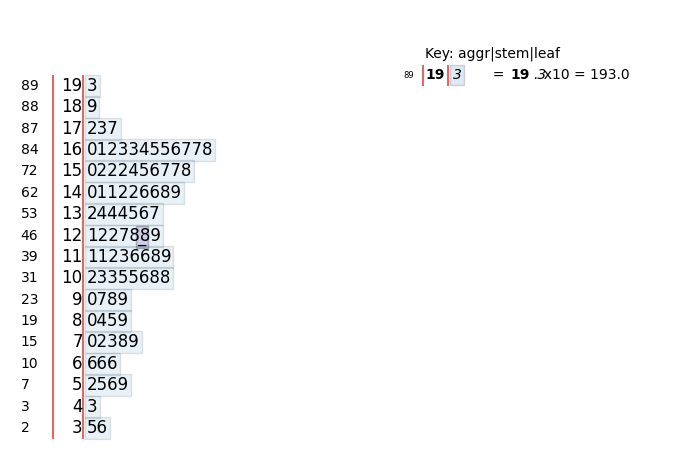

In [26]:
stemgraphic.stem_graphic(score.total, scale=10)

<Axes: xlabel='total'>

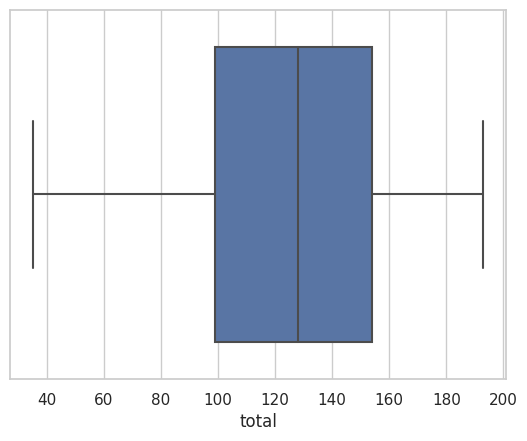

In [27]:
# 상자그림
import seaborn as sns

sns.set(style='whitegrid')
sns.boxplot(x='total', data=score)

<Axes: ylabel='total'>

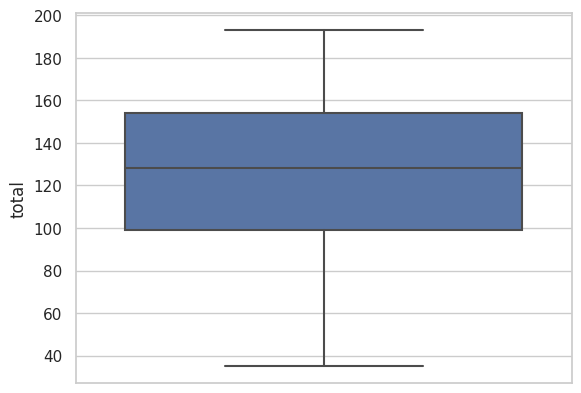

In [28]:
sns.boxplot(y='total', data=score)

<Axes: xlabel='gender', ylabel='total'>

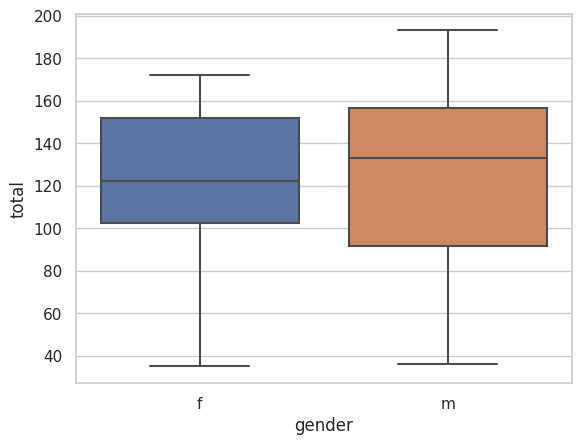

In [29]:
sns.boxplot(x='gender', y='total', data=score)

(array([ 3.,  7.,  6.,  6., 13., 11., 12., 16., 13.,  2.]),
 array([ 35. ,  50.8,  66.6,  82.4,  98.2, 114. , 129.8, 145.6, 161.4,
        177.2, 193. ]),
 <BarContainer object of 10 artists>)

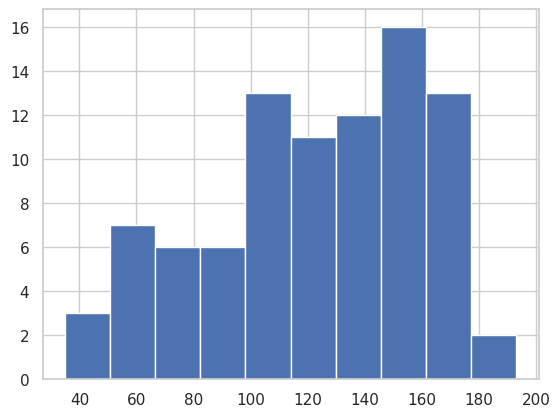

In [30]:
# 히스토그램
plt.hist(score.total)

In [32]:
ftotal = score.loc[score.gender=='f', 'total']
mtotal = score.loc[score.gender=='m', 'total']

ftotal

0     140
3     163
4     103
12    122
13     66
24    157
26    165
28    172
29    111
32    152
35    148
36     73
37    154
38     97
41     90
48    118
49     98
51    105
53    102
54    160
56     35
57    112
58    129
59    152
60    116
62    121
63     80
65    141
66    128
68    168
69    152
71     59
76    141
77    111
79    156
Name: total, dtype: int64

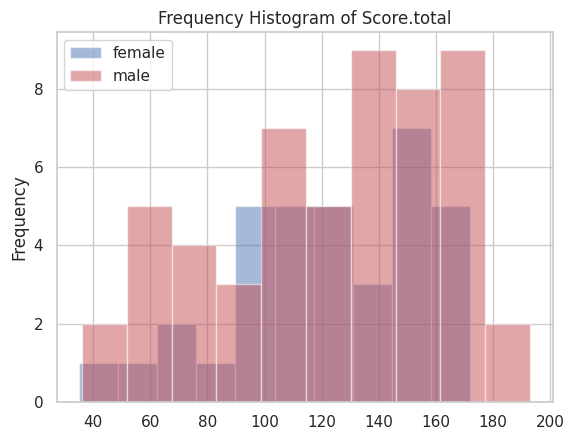

In [33]:
args = dict(alpha=0.5, bins=10)
plt.hist(ftotal, **args, color='b', label='female')
plt.hist(mtotal, **args, color='r', label='male')
plt.gca().set(title='Frequency Histogram of Score.total', ylabel='Frequency')
plt.legend()
plt.show()

In [35]:
## 빈도표 및 분할표
enqete = pd.read_csv('./enqete.csv')
enqete.head(3)

,college,grade,q1,q2
0,med,1,1.0,1
1,med,1,1.0,1
2,med,1,1.0,1


In [36]:
enqete_table = pd.crosstab(index=enqete.grade, colnames=['Grade'], columns='count')
enqete_table

Grade,count
grade,
1,103
2,103
3,100
4,94


In [37]:
enqete_table.index = ['1학년', '2학년', '3학년', '4학년']
enqete_table

Grade,count
1학년,103
2학년,103
3학년,100
4학년,94


In [38]:
grade_q1 = pd.crosstab(index=enqete.grade, columns=enqete.q1)
grade_q1.index = ['1학년', '2학년', '3학년', '4학년']
grade_q1

q1,0.0,1.0,2.0
1학년,0,80,23
2학년,0,66,37
3학년,0,55,44
4학년,1,55,38


In [41]:
enqete.q1 = enqete.q1.replace(0, np.NaN)
grade_q1 = pd.crosstab(index=enqete.grade, columns=enqete.q1)
grade_q1.index = ['1학년', '2학년', '3학년', '4학년']
grade_q1

q1,1.0,2.0
1학년,80,23
2학년,66,37
3학년,55,44
4학년,55,38


In [42]:
from scipy.stats import chi2_contingency

chi2_contingency(grade_q1) # 독립성 검정

Chi2ContingencyResult(statistic=12.402787258488466, pvalue=0.0061233649734963305, dof=3, expected_freq=array([[66.25125628, 36.74874372],
       [66.25125628, 36.74874372],
       [63.67839196, 35.32160804],
       [59.81909548, 33.18090452]]))

<BarContainer object of 4 artists>

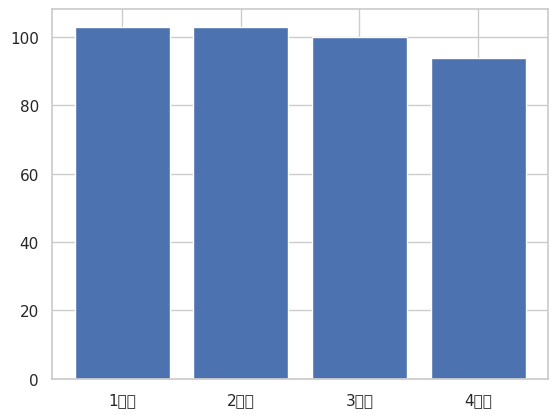

In [47]:
# 막대 그림
plt.bar(enqete_table.index, enqete_table['count'])
# enqete_table['count'].plot.bar() # 결과 동일

([<matplotlib.patches.Wedge at 0x780bd4f2a440>,
 [Text(-0.795926740046034, 0.7592763821426907, '1학년'),
  Text(-0.7209402440089244, -0.83080994491421, '2학년'),
  Text(0.8475645040313471, -0.7011664649040888, '3학년'),
  Text(0.7403138395114514, 0.8135941365495534, '4학년')])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.



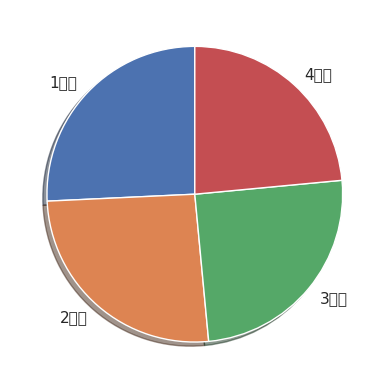

In [48]:
# 원그림
plt.pie(enqete_table['count'], labels=enqete_table.index,
        shadow=True, startangle=90)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.



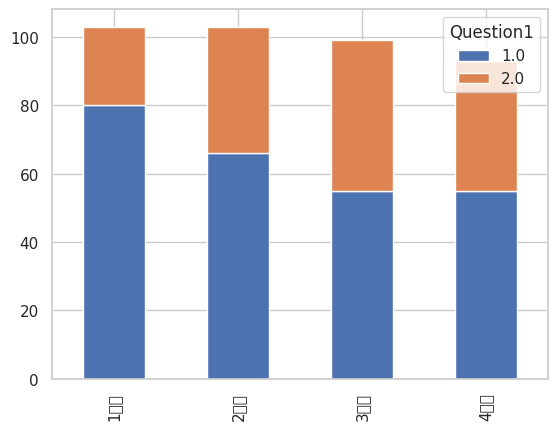

In [50]:
# 겹친 막대그림
grade_q1.plot.bar(stacked=True)
plt.legend(title='Question1')
plt.show()